In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2817,ham,Thk some of em find wtc too far... Weiyi not g...,NaN,NaN,NaN
2005,ham,Can't take any major roles in community outrea...,NaN,NaN,NaN
3211,ham,We got a divorce. Lol. She.s here,NaN,NaN,NaN
2545,ham,So are you guys asking that i get that slipper...,NaN,NaN,NaN
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#data cleaning, EDA, text processing, model building, evaluation, improvements, website, deploy

In [6]:
#cleaning data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#removing last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
700,ham,How much r Ì_ willing to pay?
5223,ham,If I die I want u to have all my stuffs.
726,ham,Of cos can lar i'm not so ba dao ok... 1 pm lo...
4184,ham,I'm good. Have you registered to vote?
2908,spam,URGENT! Your Mobile number has been awarded wi...


In [9]:
#column renaming
df.rename(columns = {'v1': 'target', 'v2':'text'}, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
#checking for missing vals
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()

403

In [13]:
#removing those duplicates
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

In [15]:
#exploratory data analysis step
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

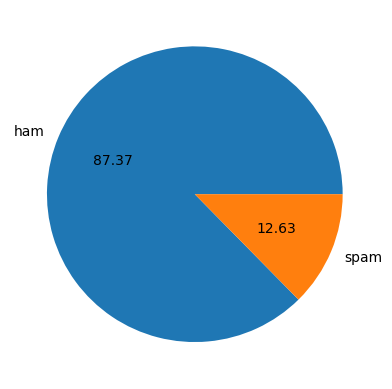

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['length_of_text'] = df['text'].apply(len)
#fetching number of words
df['number_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['number_of_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,length_of_text,number_of_words,number_of_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#for spam msgs
df[df['target'] == 1][['length_of_text', 'number_of_words', 'number_of_sents']].describe()

,length_of_text,number_of_words,number_of_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [21]:
#for non-spam msgs
df[df['target'] == 0][['length_of_text', 'number_of_words', 'number_of_sents']].describe()

,length_of_text,number_of_words,number_of_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


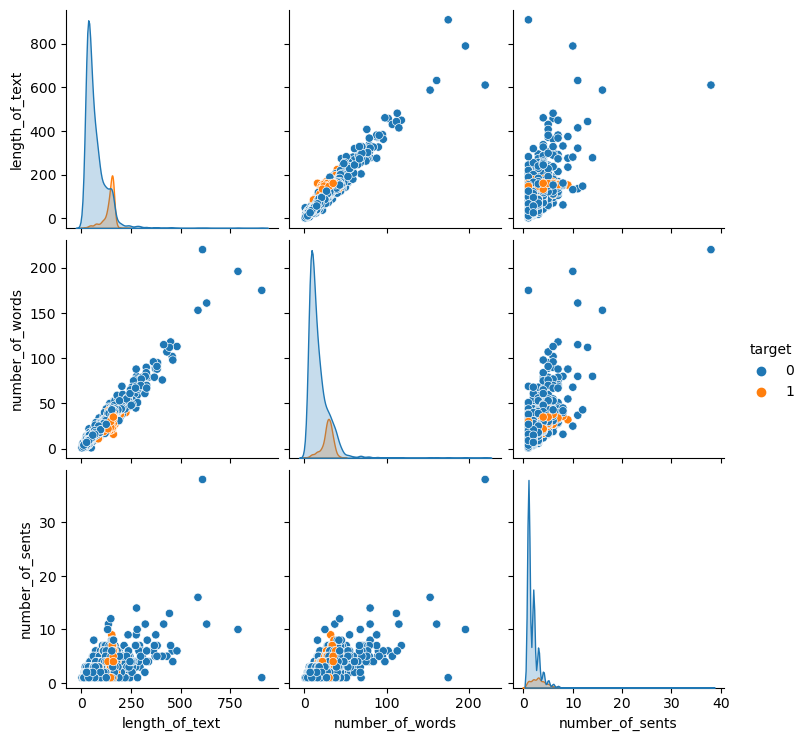

In [22]:
import seaborn as sb
sb.pairplot(df, hue = 'target')

<AxesSubplot:>

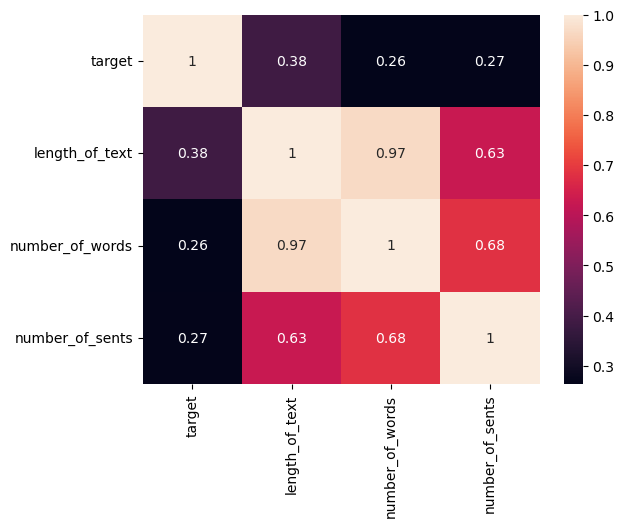

In [23]:
sb.heatmap(df.corr(), annot= True)

In [24]:
#pre-processing the data
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transf_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
df['transformed_sms'] = df['text'].apply(transf_text) 

In [25]:
df.head(5)

,target,text,length_of_text,number_of_words,number_of_sents,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


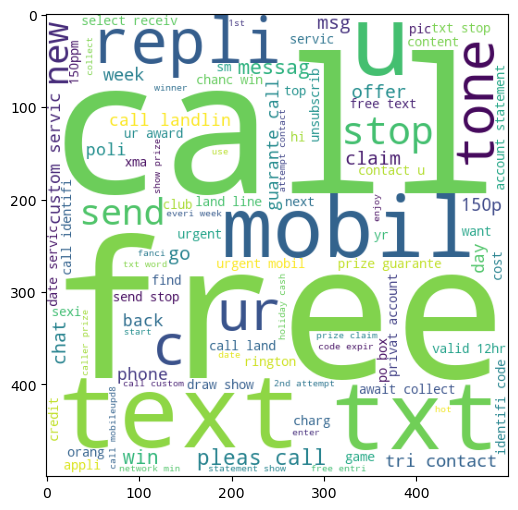

In [26]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size= 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_sms'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

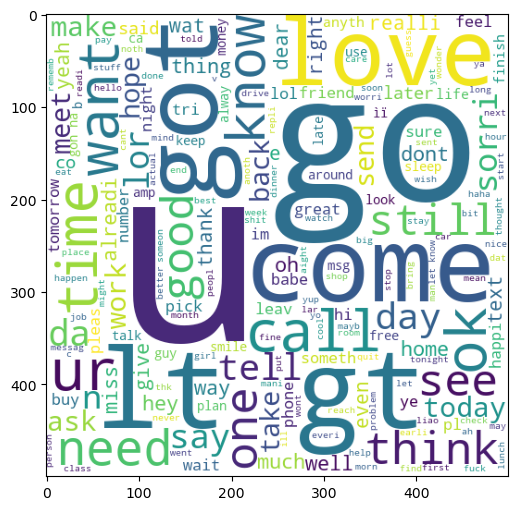

In [27]:
nonspam_wc = wc.generate(df[df['target'] == 0]['transformed_sms'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [28]:
spam_corpus = []
for sms in df[df['target'] == 1]['transformed_sms'].tolist():
    for word in sms.split():
        spam_corpus.append(word)
nonspam_corpus = []
for sms in df[df['target'] == 0]['transformed_sms'].tolist():
    for word in sms.split():
        nonspam_corpus.append(word)

C:\Users\91990\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


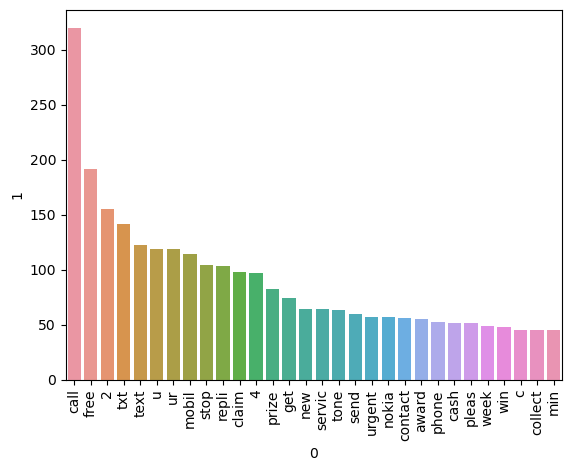

In [29]:
from collections import Counter
sb.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
#building the detector
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['transformed_sms']).toarray()
#X = np.hstack((X, df['length_of_text'].values.reshape(-1, 1)))
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform
Y = df['target'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [33]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [34]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [35]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [36]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [39]:
def detect(text):
    transformed_text = transf_text(text)
    vector_input = tfidf.transform([transformed_text])
    result = mnb.predict(vector_input)[0]
    if result == 1:
        return "Spam"
    else:
        return "Not Spam"

In [40]:
detect("hello how are you doing??")

'Not Spam'

In [43]:
detect("Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/123456 tp claim now")

'Spam'